In [4]:
from IPython.display import Image
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *

# LVM Throughput Analysis

Pavan took a 0.5-second exposure in frames 1870

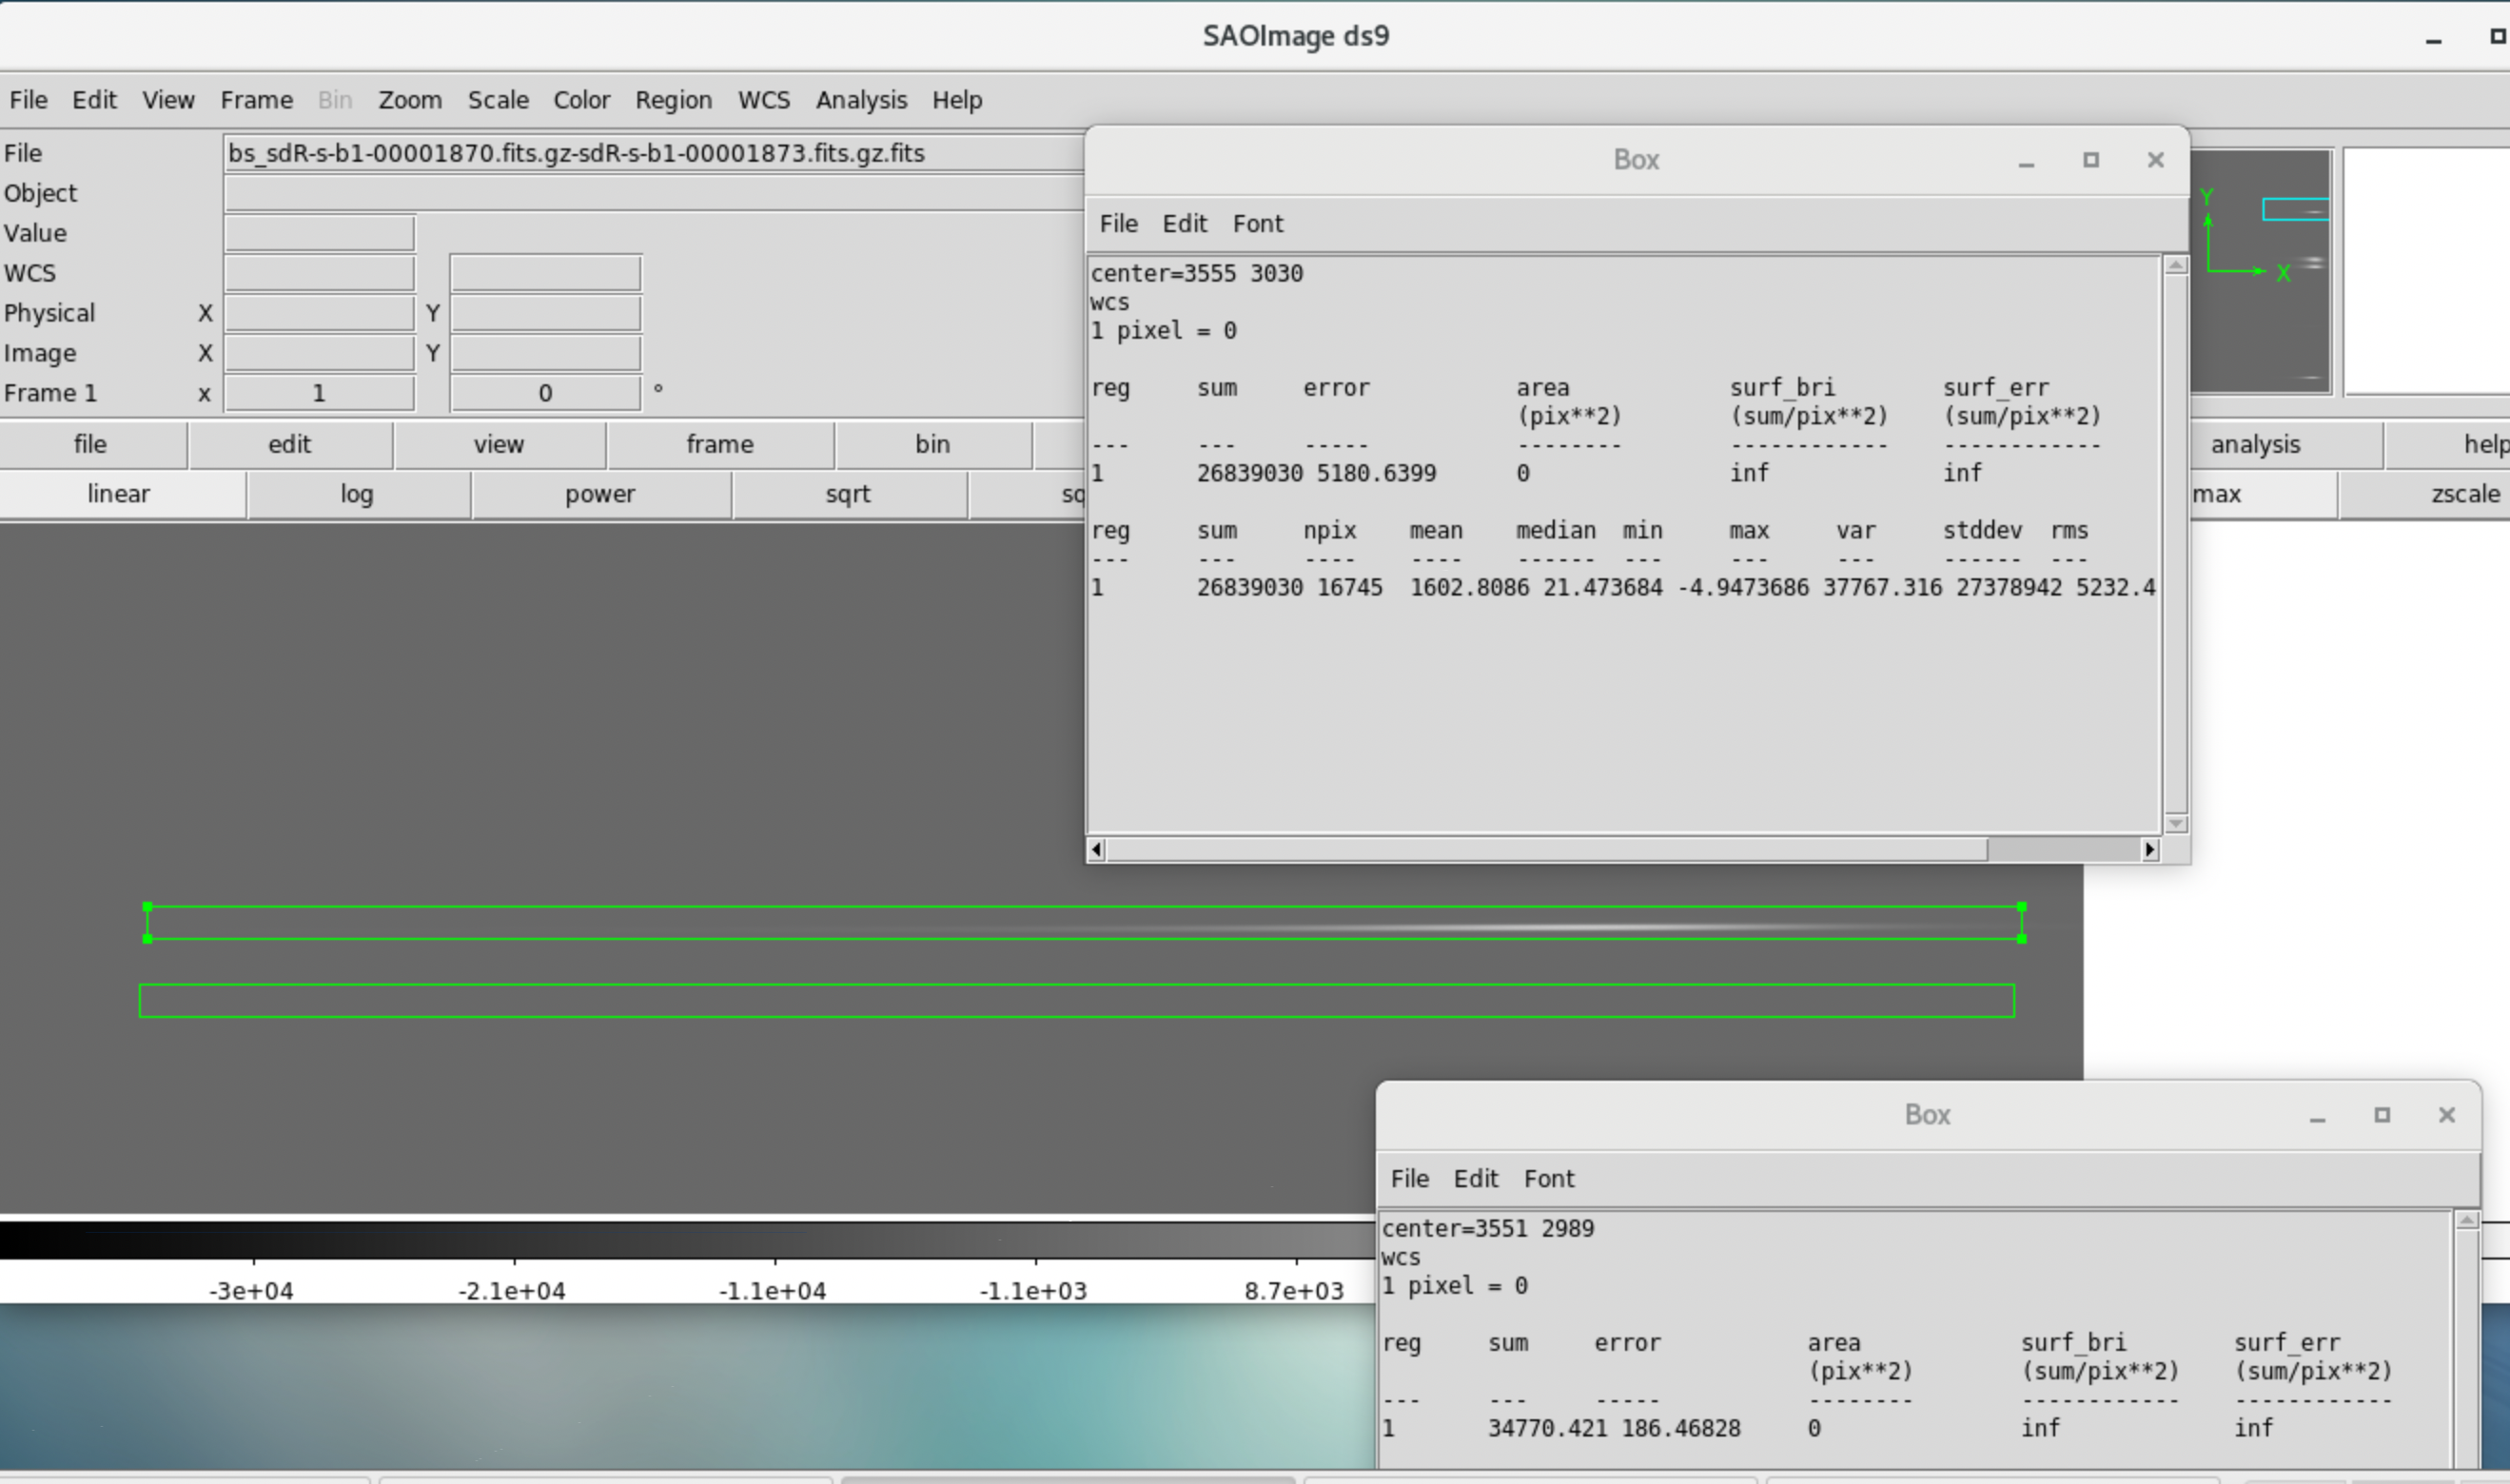

In [5]:
Image("img/sn1-blue.png")

In [6]:
ccd_dn_sig = ufloat(26_839_030, 100000) # DN uncertainty is from sliding the green bar around a few pixels
ccd_dn_back = ufloat(35_000, 1000) # DN uncertainty is from sliding the green bar around a few pixels

t_exp = ufloat(0.5, 0.3) # Exposure time limitted by shutter speed


ccd_dn = (ccd_dn_sig - ccd_dn_back) / t_exp

In [9]:
print("%s DN/s" % ccd_dn)

(5.4+/-3.2)e+07 DN/s


In [10]:
gain = ufloat(2.81,.5) # Not sure why I put 0.5 uncertainty here

In [11]:
ccd_phot = ccd_dn * gain # Number of photons received

In [13]:
print("%s elec/s" % ccd_phot)

(1.5+/-0.9)e+08 elec/s


### Photodiode measurements

In [14]:
conversion = ufloat(1.4e-3/0.5,1.4e-4) # microwatt at photodiode per amp of LED Driven current
led_current = 0.01 # Amp <-- from Pavan's log
microwatt_conversion = 1.9e12 # 1 microwatt of optical power -> photo/sec at 370 nm


In [15]:
fiber_out = conversion * \
            led_current * \
            microwatt_conversion

In [16]:
print("{:1.1e} photons expected in a second".format(fiber_out))

5.3e+07+/-0.3e+07 photons expected in a second


In [17]:
print("%s" % (ccd_phot / fiber_out))

2.8+/-1.8


# RED
Frame 1884 v 1873

In [169]:

ccd_dn_sig = ufloat(46_014_779, 100000) # DN uncertainty is from sliding the green bar around a few pixels
ccd_dn_back = ufloat(106_803, 1000) # DN uncertainty is from sliding the green bar around a few pixels

t_exp = ufloat(1, 0.1) # Exposure time limitted by shutter speed


ccd_dn = (ccd_dn_sig - ccd_dn_back) / t_exp
gain = ufloat(2.82, .1)

ccd_phot = ccd_dn * gain # Number of photons received

In [180]:
print("%s photons / second on the CCD" % ccd_phot)

(1.29+/-0.14)e+08 photons / second on the CCD


### photodiode

In [189]:
conversion = ufloat(1e-4/1,0.1e-4) # microwatt at photodiode per amp of LED Driven current
led_current = 0.015 # Amp <-- from Pavan's log
microwatt_conversion = 3.36e12 # 1 microwatt of optical power -> photo/sec at 650 nm

fiber_out = conversion * \
            led_current * \
            microwatt_conversion

In [190]:
print("{:1.1e} photons expected in a second".format(fiber_out))

5.0e+06+/-0.5e+06 photons expected in a second


https://www.wolframalpha.com/input?i=1+microwatt+%2F+%28%28h*c%29%2F%28650+nm%29%29+to+hz

In [191]:
ccd_phot/fiber_out

25.68660561904762+/-3.745511170737397